# Films Color Palette using K-Means
Given a fixed number of clusters this program identifies the principal color of the image using clustering algorithms

In [1]:
import matplotlib.pyplot as plt 
import PIL
from matplotlib import image as img
import scipy
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

Select the image (it can be of any size) 

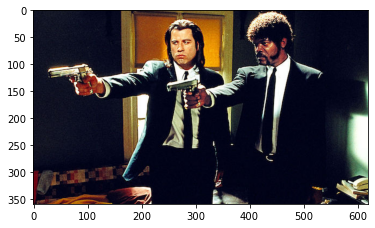

In [2]:
image = img.imread('images/pulp-fiction.jpg')
plt.imshow(image)

In [3]:
print(image)

[[[ 19  22  41]
  [ 14  17  34]
  [ 13  16  31]
  ...
  [  0   2  23]
  [  0   2  23]
  [  0   2  23]]

 [[ 17  20  39]
  [ 14  17  34]
  [ 14  17  32]
  ...
  [  2   4  25]
  [  2   4  25]
  [  3   5  26]]

 [[ 18  21  40]
  [ 16  19  36]
  [ 17  20  35]
  ...
  [  3   5  26]
  [  3   5  26]
  [  4   6  27]]

 ...

 [[120   8  24]
  [104  11  22]
  [ 85  22  31]
  ...
  [197 217 205]
  [178 199 184]
  [157 181 165]]

 [[122   7  24]
  [ 96   9  18]
  [ 70  21  27]
  ...
  [235 240 233]
  [226 236 227]
  [199 215 204]]

 [[127   5  26]
  [ 96   6  18]
  [ 66  19  27]
  ...
  [245 248 241]
  [249 254 248]
  [239 248 243]]]


In [4]:
image.shape

(359, 620, 3)

Append the 3 components of the RGB and plot them to see how they are divided in the RGB space

In [5]:
r,b,g = [], [], []
for i in range(200):
    for j in range(200):
        r.append(image[i,j,0])
        g.append(image[i,j,1])
        b.append(image[i,j,2])


In [6]:
d = {'r':r, 'g': g, 'b':b}
matrix = pd.DataFrame(d)
matrix

,r,g,b
0,19,22,41
1,14,17,34
2,13,16,31
3,16,20,32
4,17,21,33
...,...,...,...
39995,249,248,246
39996,255,254,249
39997,245,243,230
39998,251,253,240


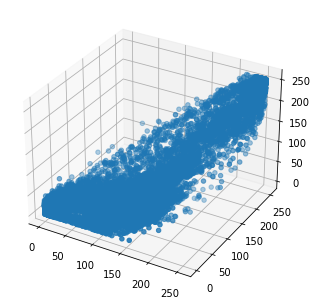

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [8]:
matrix= pd.DataFrame(matrix).to_numpy()
matrix

array([[ 19,  22,  41],
       [ 14,  17,  34],
       [ 13,  16,  31],
       ...,
       [245, 243, 230],
       [251, 253, 240],
       [248, 251, 244]], dtype=int64)

####  Kmeans of Sklearn by selecting the number of clusters.

In principle it should be the program that automaticaly chooses the right set of cluster (10 are too many but 2 are too less)

In [ ]:
n = 7

In [18]:
X = matrix
kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
kmeans.labels_

centers = kmeans.cluster_centers_
centers

array([[129.04927371,  99.0848761 ,  50.70207918],
       [ 69.77291791,  41.9197124 ,  38.64230078],
       [246.00428571, 247.66142857, 239.21785714],
       [206.3736952 , 202.09185804, 166.31210856],
       [ 12.9956834 ,  15.06731191,  32.86520757],
       [137.46260069,  52.6018412 ,  29.96087457],
       [159.8356676 , 145.58823529,  91.69281046]])

Alternatively plot the clusters (this isn't convenient due to the fact that most of the times clusters are covered by the other data)

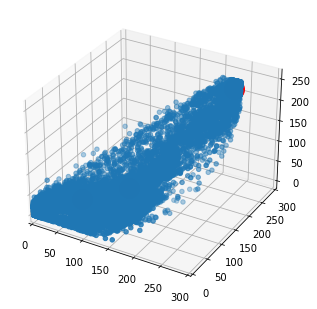

In [10]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
for i in range(len(centers[0])):
        ax.scatter(centers[i,0],centers[i,1], centers[i,2], color='r', s=400)
ax.set_xlim([0,300])
ax.set_ylim([0,300])
ax.set_xlim([0,300])

plt.show()

In [29]:
centers = centers.reshape(1,centers.shape[0],3).astype(int)

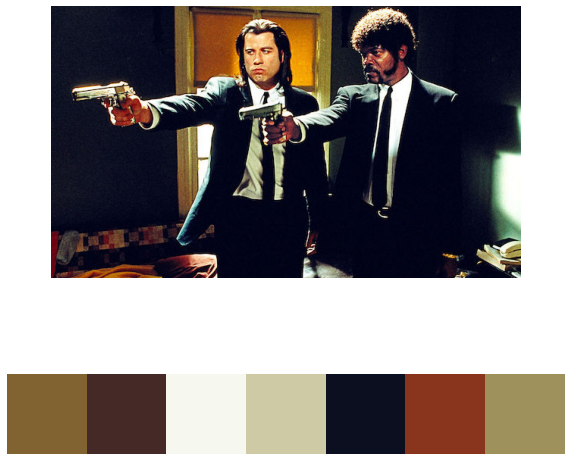

In [57]:
f = plt.figure()
f.set_figheight(10)
f.set_figwidth(10)
plt.subplots_adjust(wspace=0, hspace=0)

plt.subplot(211)
plt.imshow(image)
plt.axis('off')
plt.subplot(212)

plt.imshow(centers)
plt.axis('off')
plt.show()